In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\المجد\Desktop\karam\Nasa's Data Project\nearest-earth-objects(1910-2024).csv")

In [4]:
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


# Issues:
### some missing values.
### some duplicated names with the same data but different id.

In [5]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [6]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [7]:
df.describe(include='object')

,name,orbiting_body
count,338199,338199
unique,33514,1
top,277810 (2006 FV35),Earth
freq,211,338199


In [8]:
df = df.drop_duplicates(subset=['name'], keep='first')
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338166,54455885,(2024 NA),24.866,0.028272,0.063218,Earth,38881.858752,1.640905e+06,False
338167,54458505,(2024 NW1),26.356,0.014235,0.031830,Earth,21999.325933,9.886132e+06,False
338168,54460107,(2024 ND3),23.781,0.046597,0.104193,Earth,16846.868427,3.350483e+07,False
338186,54459238,(2024 NQ2),23.218,0.060389,0.135033,Earth,23763.806822,3.590212e+07,False


In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [11]:
df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].mean(), inplace=True)


C:\Users\المجد\AppData\Local\Temp\ipykernel_9616\4125156826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
C:\Users\المجد\AppData\Local\Temp\ipykernel_9616\4125156826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['absolute_magnitude'].fillna(df['absolu

# EDA
### Which Object Has The Most absolute magnitude?

In [12]:
df[df['absolute_magnitude']==df['absolute_magnitude'].max()]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
62222,54327740,(2022 WJ1),33.58,0.000511,0.001143,Earth,74391.102412,5.691085e+07,False


### How Many Objects Are Hazardous And How Many Are Not?

In [13]:
df['is_hazardous'].value_counts()

is_hazardous
False    31021
True      2493
Name: count, dtype: int64

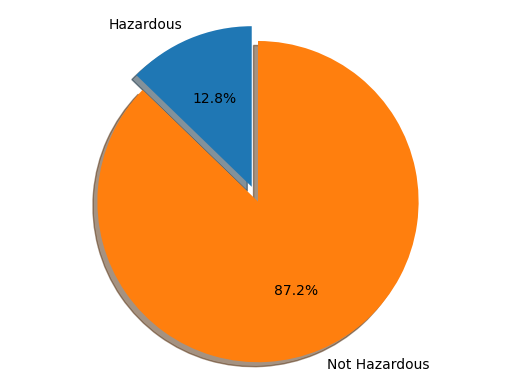

In [14]:
labels='Hazardous','Not Hazardous'
sizes=[43162,295037]
explode=(0.1,0)
fig1,ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Which Object Has The Highest Estimated Diameter Minimum?

In [15]:
df[df['estimated_diameter_min']==df['estimated_diameter_min'].max()]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
4206,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,Earth,61537.3258,5.705108e+07,False


### Which Object Has The Highest Estimated Diameter Maximum?

In [16]:
df[df['estimated_diameter_max']==df['estimated_diameter_max'].max()]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
4206,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,Earth,61537.3258,5.705108e+07,False


### What Is The Mean Of Estimated Diameter Maximum by Top 5 Objects?

C:\Users\المجد\AppData\Local\Temp\ipykernel_9616\1717303414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='estimated_diameter_max', data=mean_values, palette='viridis')


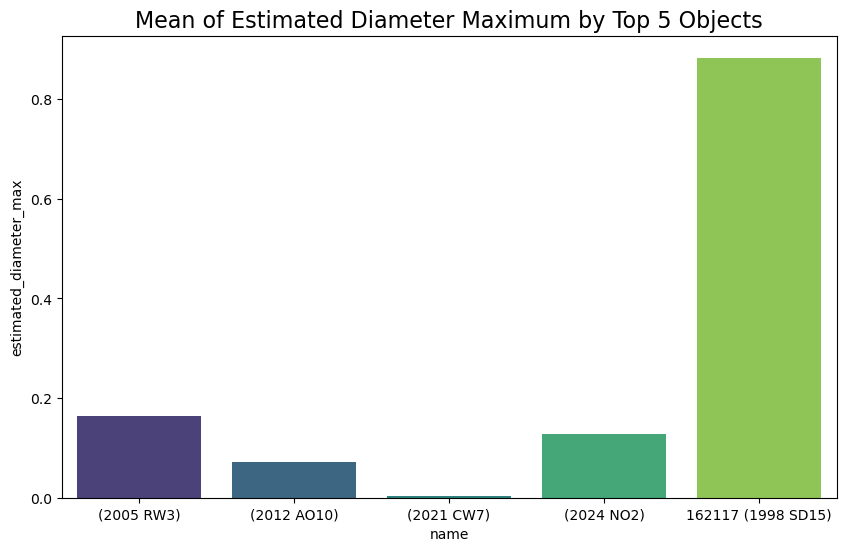

In [17]:
top_5_categories = df['name'].value_counts().nlargest(5).index
df_top_5 = df[df['name'].isin(top_5_categories)]
plt.figure(figsize=(10, 6))
mean_values = df_top_5.groupby('name')['estimated_diameter_max'].mean().reset_index()
sns.barplot(x='name', y='estimated_diameter_max', data=mean_values, palette='viridis')
plt.title(f'Mean of {'Estimated Diameter Maximum'} by Top 5 {'Objects'}', fontsize=16)
plt.show()

### Which Object Has The Highest Relative Velocity?

In [18]:
df[df['relative_velocity']==df['relative_velocity'].max()]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
11004,3989287,(2020 BZ12),18.12,0.631764,1.412668,Earth,273704.635655,5.109239e+07,False


### What Is The Mean Of Relative Velocity by Top 5 Objects?

C:\Users\المجد\AppData\Local\Temp\ipykernel_9616\2731149729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='relative_velocity', data=mean_values, palette='viridis')


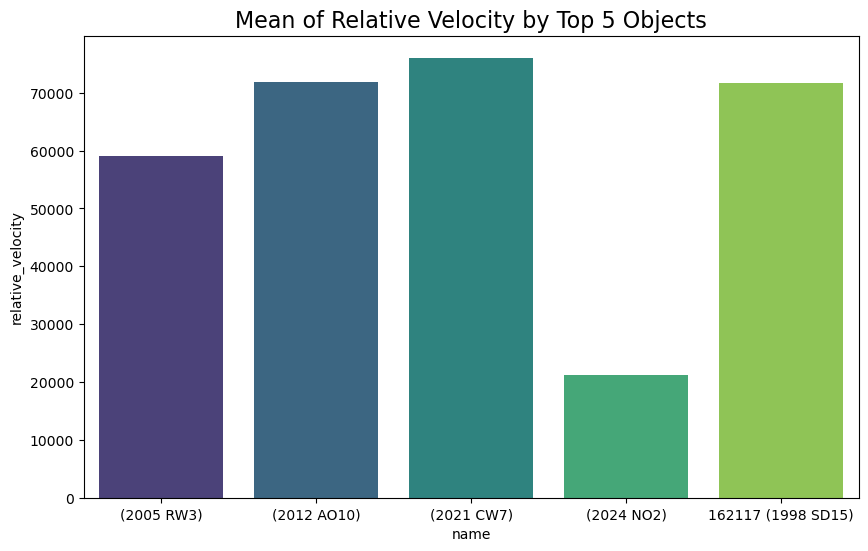

In [19]:
top_5_categories = df['name'].value_counts().nlargest(5).index
df_top_5 = df[df['name'].isin(top_5_categories)]
plt.figure(figsize=(10, 6))
mean_values = df_top_5.groupby('name')['relative_velocity'].mean().reset_index()
sns.barplot(x='name', y='relative_velocity', data=mean_values, palette='viridis')
plt.title(f'Mean of {'Relative Velocity'} by Top 5 {'Objects'}', fontsize=16)
plt.show()

### Which Object Has The Lowest Miss Distance?

In [20]:
df[df['miss_distance']==df['miss_distance'].min()]

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
309768,54051131,(2020 QG),29.9,0.002783,0.006224,Earth,44391.122303,9316.925424,False


### What Is The Mean Of Miss Distance by Top 5 Objects?

C:\Users\المجد\AppData\Local\Temp\ipykernel_9616\161130552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='miss_distance', data=mean_values, palette='viridis')


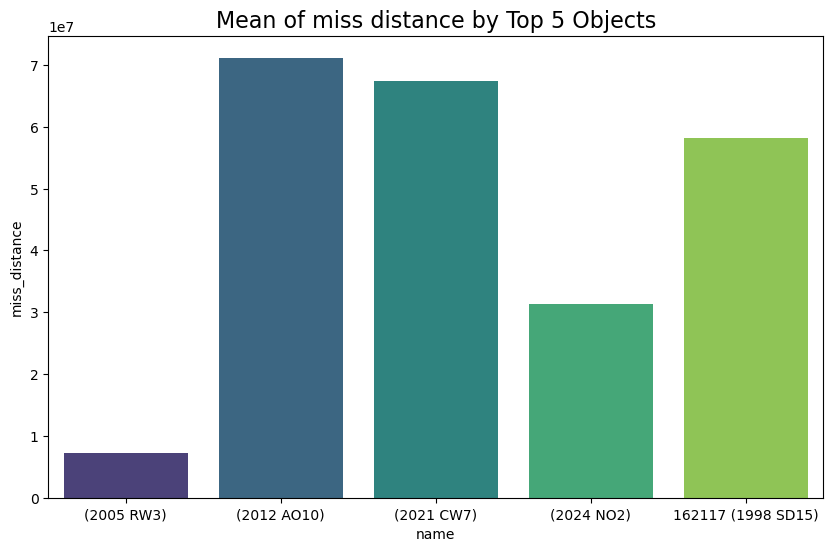

In [21]:
top_5_categories = df['name'].value_counts().nlargest(5).index
df_top_5 = df[df['name'].isin(top_5_categories)]
plt.figure(figsize=(10, 6))
mean_values = df_top_5.groupby('name')['miss_distance'].mean().reset_index()
sns.barplot(x='name', y='miss_distance', data=mean_values, palette='viridis')
plt.title(f'Mean of {'miss distance'} by Top 5 {'Objects'}', fontsize=16)
plt.show()

# Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
X=df.drop(columns=['is_hazardous','neo_id','name','orbiting_body'])
y=df['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
numeric_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
numeric_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

### Handling Imbalanced Classes using SMOTE

In [23]:
smote=SMOTE(random_state=42)
model=RandomForestClassifier(class_weight='balanced', random_state=42)
clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', model)
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### Model Test Result

In [24]:
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Balanced Accuracy: 0.778746080168073

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94      6204
        True       0.36      0.65      0.46       499

    accuracy                           0.89      6703
   macro avg       0.66      0.78      0.70      6703
weighted avg       0.92      0.89      0.90      6703



In [26]:
rf_model = clf.named_steps['classifier']
importances = rf_model.feature_importances_
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()


### Features Importance:

In [27]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importances:\n", feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importances:
                        Feature  Importance
0      num__absolute_magnitude    0.301328
1  num__estimated_diameter_min    0.223302
2  num__estimated_diameter_max    0.201379
3       num__relative_velocity    0.159586
4           num__miss_distance    0.114405
